In [52]:
import pandas as pd
import matplotlib.dates as mdates

In [53]:
# load data
bitcoin_daily = pd.read_csv("../Data/bitcoin_news_sentiment_daily_lag1.csv")
coin_daily = pd.read_csv("../Data/coinbase_news_sentiment_daily_lag1.csv")
google_trends = pd.read_csv("../google_search/google_trends_signal_daily.csv")
non_sentiment = pd.read_csv("../Data/features_lag1.csv")
# btc_returns = pd.read_csv("../yfinance_return/BTC_return.csv")
twitter_sentiment = pd.read_csv("../Data/BB_sentiment_lag1.csv")

In [54]:
twitter_sentiment = twitter_sentiment.rename(columns={"Unnamed: 0": "date_dt"})
twitter_sentiment.set_index("date_dt", inplace=True)
twitter_sentiment.head()

,TWITTER_SENTIMENT_DAILY_AVG,TWITTER_PUBLICATION_COUNT,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_SENTIMENT_DAILY_MAX,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_SENTIMENT_DAILY_MIN,NEWS_SENTIMENT_DAILY_AVG
date_dt,,,,,,,,
2021-04-02,0.0032,10.0,1.0,1.0,0.1068,14.0,-0.1068,-0.6321
2021-04-03,0.0019,174.0,2.0,8.0,0.1068,169.0,-0.1068,0.0005
2021-04-04,0.0019,174.0,2.0,8.0,0.1068,169.0,-0.1068,0.0005
2021-04-05,0.0019,174.0,2.0,8.0,0.1068,169.0,-0.1068,0.0005
2021-04-06,0.0025,41.0,1.0,2.0,0.1070,34.0,0.0000,0.0000


In [55]:
bitcoin_daily.set_index("date_dt", inplace=True)
bitcoin_daily = bitcoin_daily.rename(columns={"signal": "btc_signal"})
bitcoin_daily.head()

,positive_count,negative_count,neutral_count,positive_avg_score,negative_avg_score,neutral_avg_score,total_news_count,total_news_score,btc_signal
date_dt,,,,,,,,,
2021-04-15,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,0.666667
2021-04-16,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,-0.250000
2021-04-17,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,-0.333333
2021-04-19,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,-0.500000
2021-04-20,3.0,5.0,2.0,0.867508,0.785641,0.786232,10.0,-1.325679,-0.250000


In [56]:
coin_daily.set_index("date_dt", inplace=True)
# add coinbase prefix to columns
coin_daily.columns = ["coinbase_" + col for col in coin_daily.columns]
coin_daily.head()

,coinbase_positive_count,coinbase_negative_count,coinbase_neutral_count,coinbase_positive_avg_score,coinbase_negative_avg_score,coinbase_neutral_avg_score,coinbase_total_news_count,coinbase_total_news_score,coinbase_signal
date_dt,,,,,,,,,
2021-04-14,1.0,0.0,2.0,0.757015,0.000000,0.798267,3.0,0.757015,1.000000
2021-04-15,44.0,23.0,94.0,0.786364,0.817363,0.884039,161.0,15.800687,0.313433
2021-04-16,51.0,28.0,73.0,0.823400,0.890134,0.858108,152.0,17.069669,0.291139
2021-04-17,14.0,12.0,44.0,0.794744,0.798550,0.832263,70.0,1.543818,0.076923
2021-04-18,3.0,2.0,9.0,0.662382,0.733936,0.782948,14.0,0.519273,0.200000


In [57]:
google_trends.set_index("date", inplace=True)
google_trends.index.names = ["date_dt"]
google_trends.head()

,signal
date_dt,
2021-04-11,0.137663
2021-04-12,0.120701
2021-04-13,0.103739
2021-04-14,0.086777
2021-04-15,0.069814


In [58]:
non_sentiment.set_index("Unnamed: 0", inplace=True)
non_sentiment.index.names = ["date_dt"]
non_sentiment.head()

,Open,High,Low,Close,Adj Close,Volume,close_open,Daily Return,cumulative_return,30D_Moving_STD,...,DTB3_lag1,DTB3_lag2,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-15,63523.753906,64863.097656,61554.796875,63109.695312,63109.695312,7.745178e+10,-414.058594,0.003237,0.003237,3795.270489,...,0.02,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094
2021-04-16,63075.195312,63821.671875,62208.964844,63314.011719,63314.011719,6.095438e+10,238.816406,0.003237,0.003237,3795.270489,...,0.02,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094
2021-04-17,63258.503906,63594.722656,60222.531250,61572.789062,61572.789062,8.429301e+10,-1685.714844,-0.027501,-0.024353,3795.270489,...,0.02,0.02,2.55,2.56,4170.419922,4124.660156,16.57,16.99,0.011094,0.011094
2021-04-18,61529.921875,62572.175781,60361.351562,60683.820312,60683.820312,6.613876e+10,-846.101562,-0.014438,-0.038439,3795.270489,...,0.02,0.02,2.57,2.55,4185.470215,4170.419922,16.25,16.57,0.003609,0.011094
2021-04-19,60701.886719,61057.457031,52829.535156,56216.183594,56216.183594,9.746887e+10,-4485.703125,-0.073622,-0.109231,3795.270489,...,0.02,0.02,2.57,2.57,4185.470215,4185.470215,16.25,16.25,0.000000,0.003609


In [59]:
# btc_returns.set_index("Unnamed: 0", inplace=True)
# btc_returns.index.names = ["date_dt"]
# btc_returns.head()

In [60]:
# merge data on returns
data = pd.merge(bitcoin_daily, coin_daily, on="date_dt", how="left")
data = pd.merge(data, google_trends, on="date_dt", how="left")
data = pd.merge(data, non_sentiment, on="date_dt", how="left")
# data = pd.merge(data, btc_returns, on="date_dt", how="left")
data = pd.merge(data, twitter_sentiment, on="date_dt", how="left")

data.head()

,positive_count,negative_count,neutral_count,positive_avg_score,negative_avg_score,neutral_avg_score,total_news_count,total_news_score,btc_signal,coinbase_positive_count,...,S&P_Return_lag1,S&P_Return_lag2,TWITTER_SENTIMENT_DAILY_AVG,TWITTER_PUBLICATION_COUNT,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_SENTIMENT_DAILY_MAX,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_SENTIMENT_DAILY_MIN,NEWS_SENTIMENT_DAILY_AVG
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-15,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,0.666667,44.0,...,0.011094,0.011094,0.0064,7425.0,241.0,544.0,0.1311,6209.0,-0.0053,0.0101
2021-04-16,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,-0.250000,51.0,...,0.011094,0.011094,-0.0073,27665.0,2092.0,1964.0,0.0867,22738.0,-0.0229,0.0903
2021-04-17,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,-0.333333,14.0,...,0.011094,0.011094,-0.0099,6715.0,563.0,563.0,0.2201,5262.0,-0.0940,0.1233
2021-04-19,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,-0.500000,5.0,...,0.000000,0.003609,-0.0099,6715.0,563.0,563.0,0.2201,5262.0,-0.0940,0.1233
2021-04-20,3.0,5.0,2.0,0.867508,0.785641,0.786232,10.0,-1.325679,-0.250000,20.0,...,0.000000,0.000000,-0.0069,2046.0,152.0,125.0,0.0520,1694.0,-0.1547,-0.1008


In [61]:
# save data
data.to_csv(r"../Data/Aggregated_Final_Data.csv")

In [62]:
# # make sweetviz report
# import sweetviz as sv

# report = sv.analyze(data)

# # save report
# report.show_html("../response_variable/report.html")

In [63]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# drop rows with missing values
data = data.dropna()

In [64]:
from sklearn.metrics import mean_squared_error
import joblib


# cumulative sum for last 100 days of news sentiment
data["total_news_score_lag_100_sum"] = data["total_news_score"].rolling(100).sum()
data = data.dropna()

# split data
cols = [
    "stoch_%K",
    "stoch_%D",
    "S&P500 Return",
    "rsi",
    "negative_count",
    "positive_count",
    "total_news_score",
    "negative_avg_score",
    "positive_avg_score",
    "btc_signal",
    "signal",
    "total_news_score_lag_100_sum",
    "Daily Return",
]
X = data[cols].drop(columns=["Daily Return"])
y = data["Daily Return"]

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# print adjusted r squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R Squared: {adj_r_squared}")

# save model
joblib.dump(model, "../Modeling/models/LR_model_ideal.pkl")

Mean Squared Error: 0.00047884650002640277
R Squared: 0.4353432957139304
Adjusted R Squared: 0.3976995154281925


['../Modeling/models/LR_model_ideal.pkl']

In [65]:
# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# save results
results.to_csv("../Modeling/models/LR_results_ideal.csv")

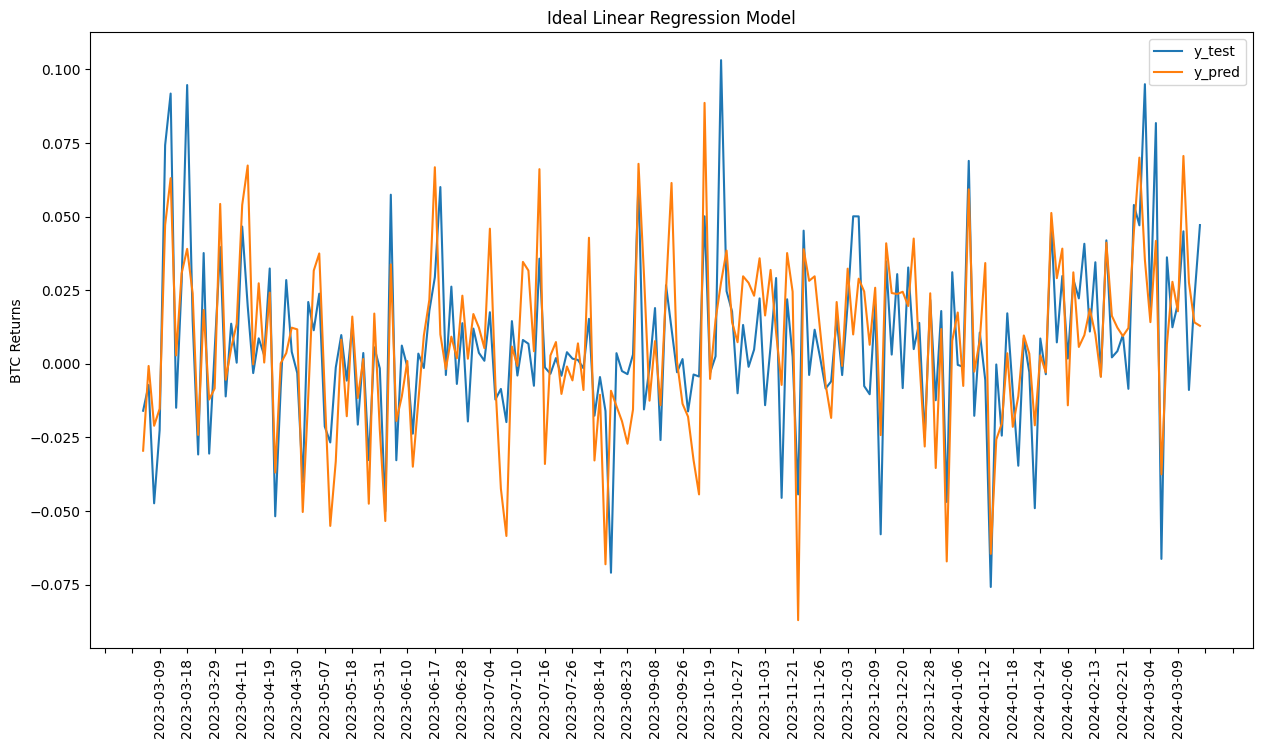

In [66]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results["y_test"], label="y_test")
plt.plot(results["y_pred"], label="y_pred")
plt.legend()
plt.title("Ideal Linear Regression Model")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
# Set x-axis major ticks to occur every 300 days.
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.ylabel("BTC Returns")
plt.show()

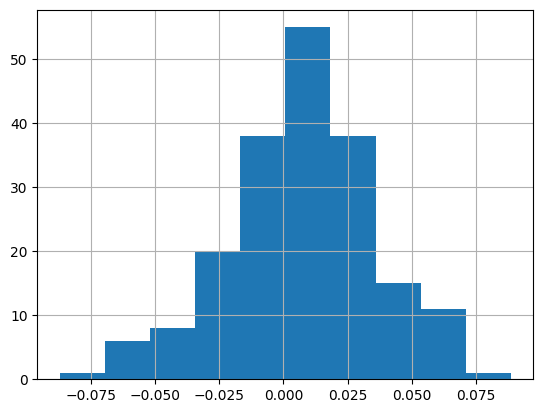

In [67]:
# plot hist fot y_pred
results["y_pred"].hist()
plt.show()

<Axes: >

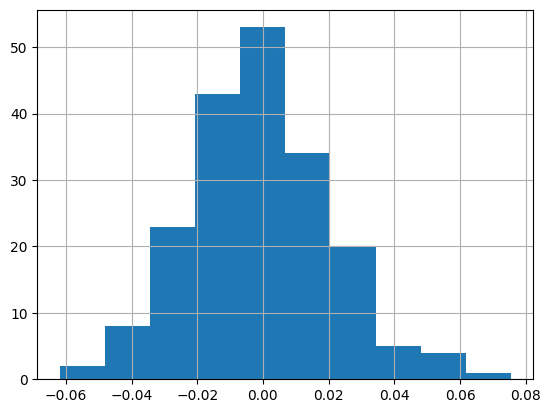

In [68]:
results["residuals"].hist()

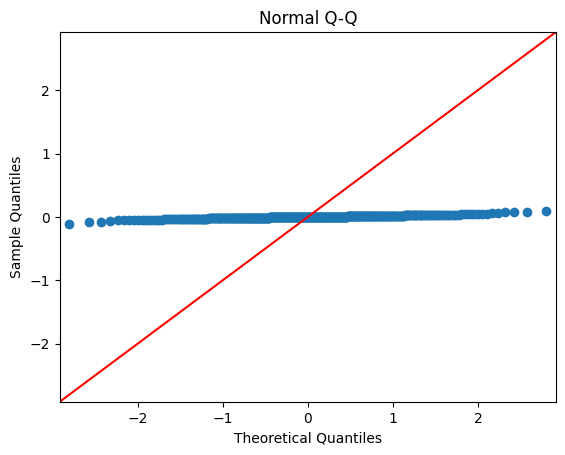

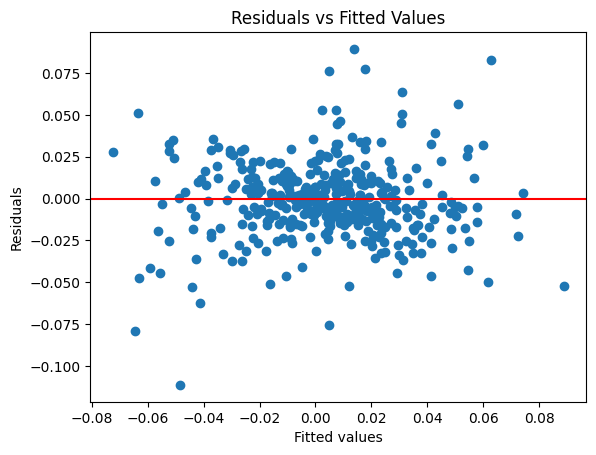

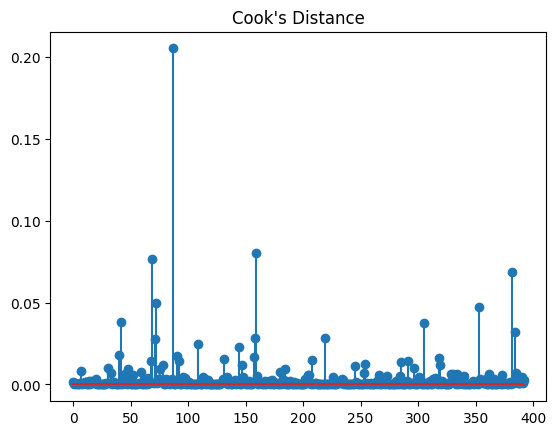

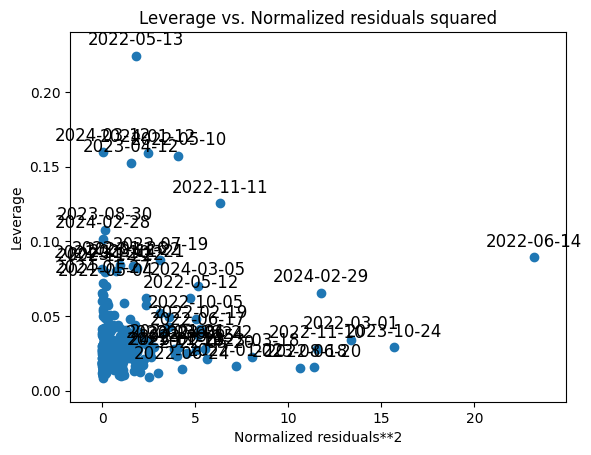

<Figure size 1000x1000 with 0 Axes>

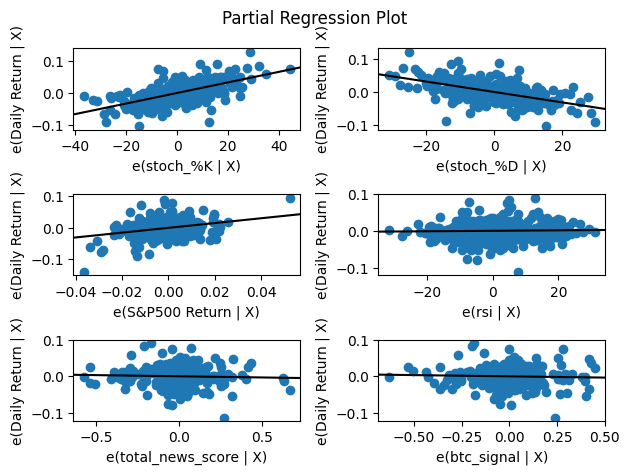

<Figure size 1000x1000 with 0 Axes>

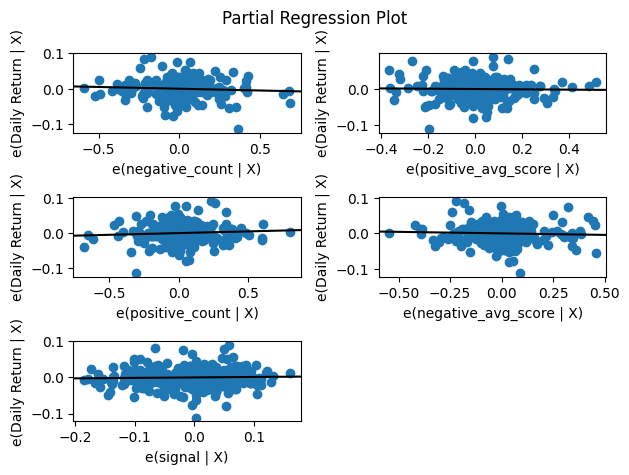

In [69]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit your model
model = sm.OLS(y, X)
results = model.fit(cov_type="HC3")

# Get predicted values
y_pred = results.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create a Q-Q plot of the residuals
sm.qqplot(results.resid, line="45")
plt.title("Normal Q-Q")
plt.show()

# Create a scatter plot
plt.scatter(y_pred, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="-")  # Add a horizontal line at y = 0
plt.title("Residuals vs Fitted Values")
plt.show()

# create a cooks distance plot
influence = results.get_influence()
cooks_distance = influence.cooks_distance[0]
plt.stem(range(len(cooks_distance)), cooks_distance)
plt.title("Cook's Distance")
plt.show()

# create a leverage plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2

plot_leverage_resid2(results)

# create a partial regression plot
from statsmodels.graphics.regressionplots import plot_partregress_grid

plt.figure(figsize=(10, 10))
# choose the variables you want to plot
plot_partregress_grid(
    results,
    ["stoch_%K", "stoch_%D", "S&P500 Return", "rsi", "total_news_score", "btc_signal"],
)
plt.tight_layout()

plt.show()

# now plot the other variables
plt.figure(figsize=(10, 10))
plot_partregress_grid(
    results,
    [
        "negative_count",
        "positive_avg_score",
        "positive_count",
        "negative_avg_score",
        "signal",
    ],
)
plt.tight_layout()

plt.show()

In [70]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Daily Return   R-squared (uncentered):                   0.577
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              26.05
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                    1.20e-42
Time:                        08:52:38   Log-Likelihood:                          926.44
No. Observations:                 393   AIC:                                     -1829.
Df Residuals:                     381   BIC:                                     -1781.
Df Model:                          12                                                  
Covariance Type:                  HC3                                                  
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
stoch_%K                         0.0017      0.000     12.625      0.000       0.001       0.002
stoch_%D                        -0.0016      0.000    -11.205      0.000      -0.002      -0.001
S&P500 Return                    0.7611      0.214      3.564      0.000       0.343       1.180
rsi                           6.382e-05   9.61e-05      0.664      0.507      -0.000       0.000
negative_count                  -0.0100      0.010     -1.013      0.311      -0.029       0.009
positive_count                   0.0097      0.009      1.141      0.254      -0.007       0.026
total_news_score                -0.0064      0.010     -0.665      0.506      -0.025       0.012
negative_avg_score              -0.0085      0.012     -0.718      0.473      -0.032       0.015
positive_avg_score              -0.0042      0.013     -0.331      0.741      -0.029       0.021
btc_signal                      -0.0069      0.011     -0.635      0.525      -0.028       0.014
signal                           0.0128      0.018      0.731      0.465      -0.022       0.047
total_news_score_lag_100_sum  8.623e-07   2.98e-05      0.029      0.977   -5.75e-05    5.92e-05
==============================================================================
Omnibus:                       30.757   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.307
Skew:                           0.051   Prob(JB):                     2.27e-28
Kurtosis:                       5.786   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC3)
[3] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean Squared Error: 6.012481683826785e-06
R Squared: 0.9929100701540414


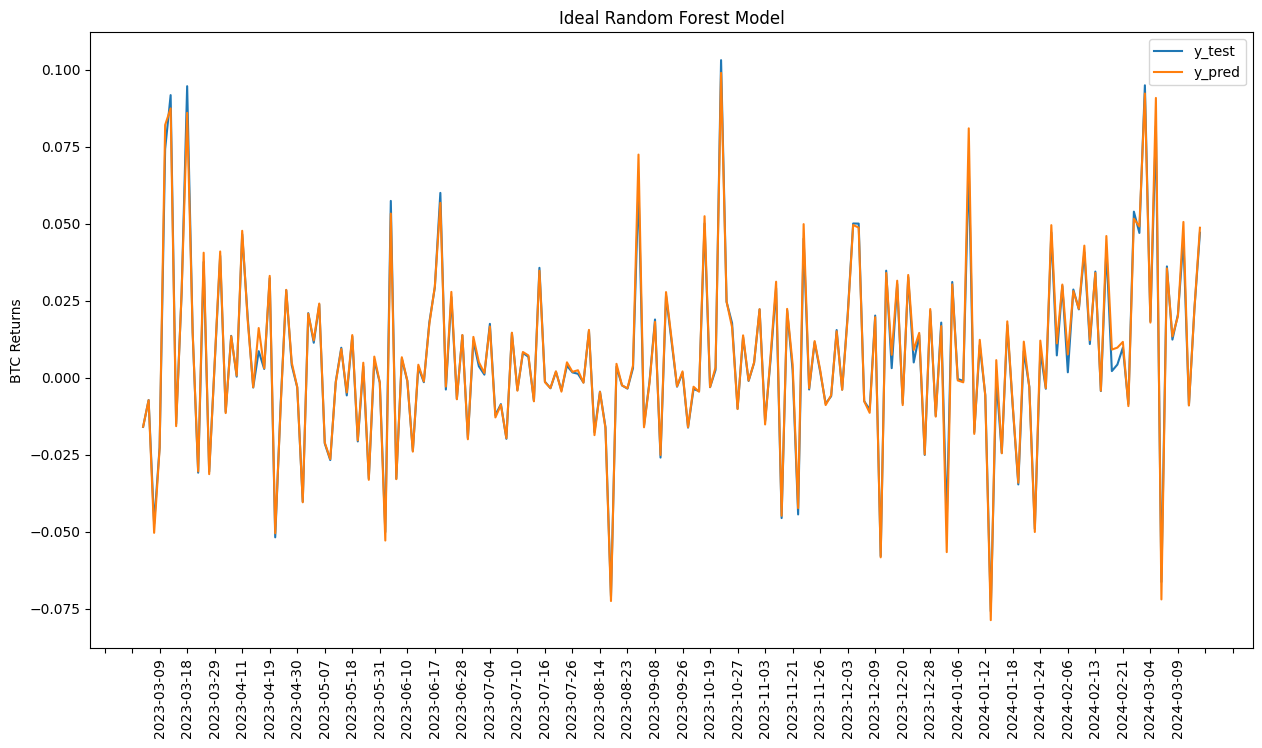

Feature ranking:
1. Relative_Intraday_Price_Change (0.9116683093695871)
2. close_open (0.04299605172955364)
3. Parkinson_Volatility (0.019938427552625294)
4. coinbase_total_news_score (0.002867552976370102)
5. rsi (0.0017105504949531582)
6. coinbase_negative_count (0.0013148518231518923)
7. neutral_avg_score (0.001094669841670111)
8. S&P500 Return (0.0010223530409979981)
9. total_news_score (0.0009163218172612888)
10. DGS10 (0.0008178445446450629)
11. TWITTER_SENTIMENT_DAILY_AVG (0.0008039272999664472)
12. TWITTER_NEG_SENTIMENT_COUNT (0.0007921045351675284)
13. total_news_score_lag_100_sum (0.0007345216945910389)
14. T5YIE (0.0007127531894956002)
15. TWITTER_PUBLICATION_COUNT (0.0006677644107433659)
16. coinbase_neutral_count (0.0006002501858962776)
17. negative_count (0.000599581116808066)
18. coinbase_signal (0.0005651940880701843)
19. VIX Close (0.0005437150871523286)
20. cumulative_return (0.0005301019017096099)
21. S&P_Return_lag2 (0.0004570749286350009)
22. coinbase_positive_avg_

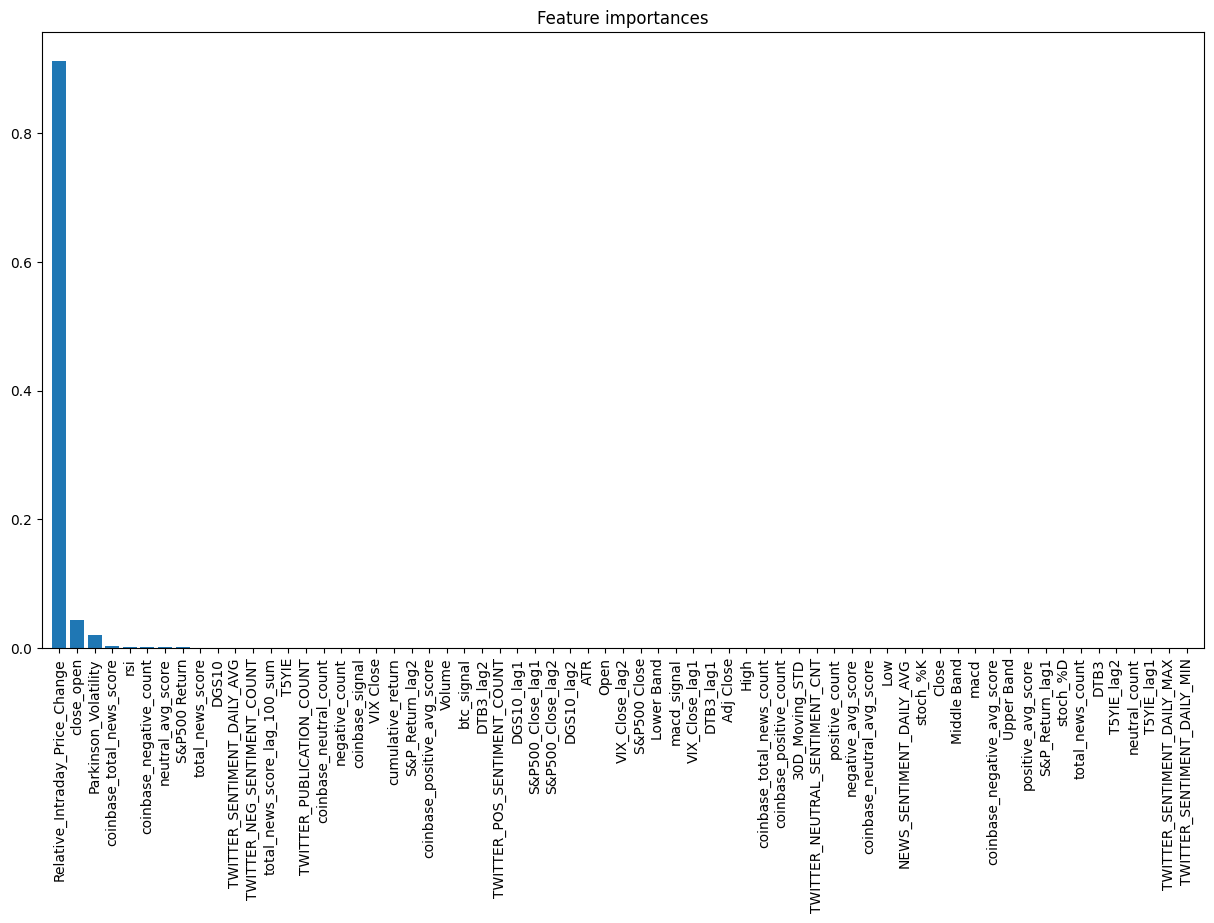

In [71]:
# random forest model
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# fit model
model = RandomForestRegressor()

data = data.dropna(subset=["Daily Return"])

X = data.drop(columns=["Daily Return"])

# drop signal column
X = X.drop(columns=["signal"])

y = data["Daily Return"]


split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# save model
joblib.dump(model, "../Modeling/models/ideal_RF/model_random_forest.pkl")

# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# save results
results.to_csv("../Modeling/models/ideal_RF/results_random_forest.csv")

# plot results
plt.plot(results["y_test"], label="y_test")
plt.plot(results["y_pred"], label="y_pred")

plt.legend()
plt.title("Ideal Random Forest Model")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
# Set x-axis major ticks to occur every 300 days.
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.ylabel("BTC Returns")

plt.show()

# feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.gcf().set_size_inches(15, 8)
plt.show()